# Calculating Stock Returns from scratch using Python

# The return on a stock $j$ is calculated as...
$$r_j = \frac{P_t}{P_{t-1}}-1$$

Where: <br>
$P_t = $ Price of stock $j$ at time $t$
<br>
$P_{t-1} = $ Price of stock $j$ at time $t-1$

## The Stock of Choice Will Be <br>
# Virtu Financial, Inc. (VIRT)<br>
## The data will come from Yahoo! Finance and will contain YTD information with the the last date being the current date, today (Friday, March 03, 2023)

In [65]:
# Import package dependencies for this implementation
import pandas as pd # used in this implementation for dealing with data
import matplotlib.pyplot as plt # used in this implementation for plotting
import seaborn as sns # used in this implementation for making plots look a little better
sns.set() # used in this implementation for implementing Seaborn's style and themes

In [66]:
# Loading Virtu Financial price data (Source: Yahoo! Finance)

df = pd.read_csv("~\Desktop\Compilation of Data Science Quantitative Finance and Statistics\Calculating Stock Returns\data\VIRT_Virtu_Financial,_Inc_from_Yahoo.csv")

# Note that using "../" changes the directory to the preceeding folder.

In [67]:
# df.head() is used for displaying the first 5 rows of the dataframe (as shown below).
# You can use .head() to view data you're working/dealing with.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,20.500000,20.840000,20.450001,20.690001,20.427132,553900
1,2023-01-04,20.650000,21.070000,20.620001,20.959999,20.693699,873000
2,2023-01-05,20.830000,21.415001,20.830000,21.170000,20.901031,1019800
3,2023-01-06,21.120001,21.423000,20.389999,21.230000,20.960270,915400
4,2023-01-09,21.230000,21.639999,21.000000,21.299999,21.029379,733500


In [68]:
#Extracting 'Date' and 'Adj Close' columns only
df = df[['Date', 'Adj Close']]

In [69]:
# Why rename columns?
# Using the PEP8 name conventions and styles when writing code is said to be good practice.
# This may be intended to make code more easily readable by others (and, possibly, you in the future)

#PEP8 standards can be found at this link: https://peps.python.org/pep-0008/

df.rename(columns={'Date': 'date', 'Adj Close' : 'price_t'}, inplace=True)

In [70]:
df.head()

,date,price_t
0,2023-01-03,20.427132
1,2023-01-04,20.693699
2,2023-01-05,20.901031
3,2023-01-06,20.960270
4,2023-01-09,21.029379


In [71]:
df['price_t-1'] = df['price_t'].shift(1)

In [72]:
df.head()

,date,price_t,price_t-1
0,2023-01-03,20.427132,NaN
1,2023-01-04,20.693699,20.427132
2,2023-01-05,20.901031,20.693699
3,2023-01-06,20.960270,20.901031
4,2023-01-09,21.029379,20.960270


In [73]:
# Calculate returns using the formula ((P_t / P_t-1) - 1)
df['returns_manual'] = (df['price_t'] / df['price_t-1']) - 1

In [74]:
df.head()

,date,price_t,price_t-1,returns_manual
0,2023-01-03,20.427132,NaN,NaN
1,2023-01-04,20.693699,20.427132,0.013050
2,2023-01-05,20.901031,20.693699,0.010019
3,2023-01-06,20.960270,20.901031,0.002834
4,2023-01-09,21.029379,20.960270,0.003297


In [75]:
df.tail()

,date,price_t,price_t-1,returns_manual
36,2023-02-24,18.886950,18.738855,0.007903
37,2023-02-27,18.650000,18.886950,-0.012546
38,2023-02-28,18.379999,18.650000,-0.014477
39,2023-03-01,18.490000,18.379999,0.005985
40,2023-03-02,18.410000,18.490000,-0.004327


In [76]:
# Calculating the returns using the pct_change() methad
df['returns_pct_change_method'] = df['price_t'].pct_change(1)

In [77]:
df.head()

,date,price_t,price_t-1,returns_manual,returns_pct_change_method
0,2023-01-03,20.427132,NaN,NaN,NaN
1,2023-01-04,20.693699,20.427132,0.013050,0.013050
2,2023-01-05,20.901031,20.693699,0.010019,0.010019
3,2023-01-06,20.960270,20.901031,0.002834,0.002834
4,2023-01-09,21.029379,20.960270,0.003297,0.003297


In [78]:
# Now "manually" calculate the returns, without using a separate column for price_t-1
df['returns'] = (df['price_t'] / df['price_t'].shift(1)) - 1

In [79]:
df.head()

,date,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
0,2023-01-03,20.427132,NaN,NaN,NaN,NaN
1,2023-01-04,20.693699,20.427132,0.013050,0.013050,0.013050
2,2023-01-05,20.901031,20.693699,0.010019,0.010019,0.010019
3,2023-01-06,20.960270,20.901031,0.002834,0.002834,0.002834
4,2023-01-09,21.029379,20.960270,0.003297,0.003297,0.003297


In [80]:
# Setting 'date' column as the index to help in ensuring dates show up in the plot.
df.set_index('date', inplace=True)

In [81]:
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
date,,,,,
2023-01-03,20.427132,NaN,NaN,NaN,NaN
2023-01-04,20.693699,20.427132,0.013050,0.013050,0.013050
2023-01-05,20.901031,20.693699,0.010019,0.010019,0.010019
2023-01-06,20.960270,20.901031,0.002834,0.002834,0.002834
2023-01-09,21.029379,20.960270,0.003297,0.003297,0.003297


<AxesSubplot:xlabel='date'>

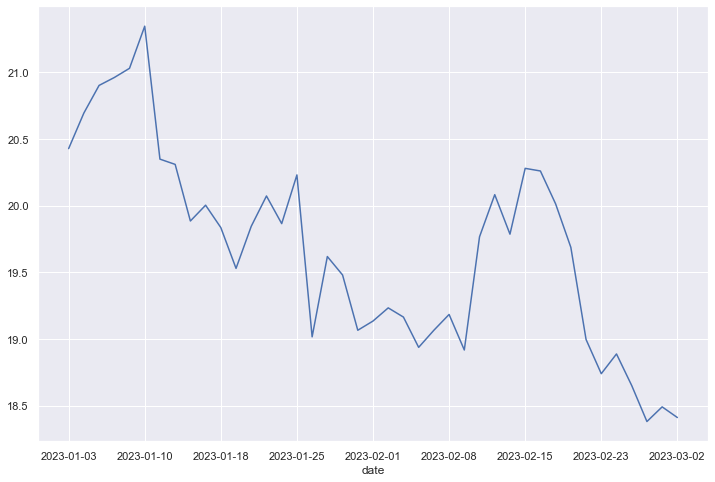

In [82]:
df['price_t'].plot(figsize=(12, 8))

<AxesSubplot:xlabel='date'>

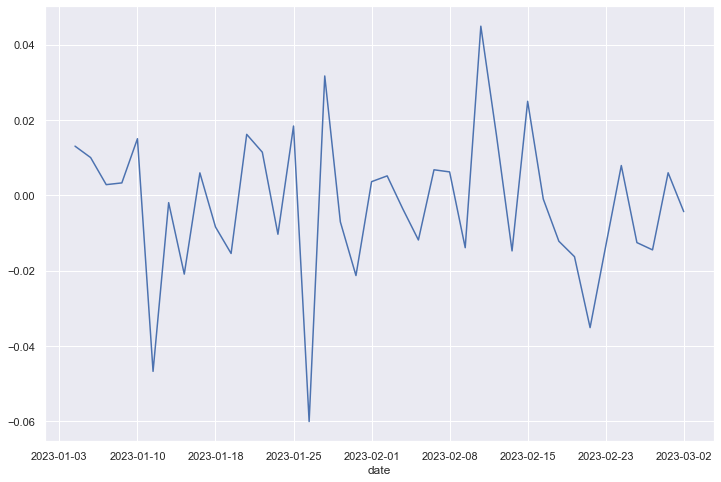

In [83]:
# Plotting Virtu Financial's Returns data
df['returns'].plot(figsize=(12, 8))